# Fairness metrics


## Credit bias dataset<br>




In [1]:
import ml.smile.data.Loader

val df = Loader.csv(Loader.homeRelativePath("data/credit_bias-train.csv").toString)

In [2]:
val subset = df
      .select("NewCreditCustomer", "Amount", "Interest", "LoanDuration", "Education", "PaidLoan")
      .omitNullRows()
      .factorize("Education", "NewCreditCustomer", "PaidLoan")

In [3]:
subset.summary

[column: String, count: long, min: double, avg: double, max: double]
+------------+-----+----+-----------+-----+
|      column|count| min|        avg|  max|
+------------+-----+----+-----------+-----+
|      Amount|57943|6.39|2242.581353|10632|
|    Inte…

In [4]:
val target = "PaidLoan"
val protectedAttribute = "Education"

In [5]:
import smile.classification.RandomForest
import smile.data.formula.Formula

val formula = Formula.lhs(target)
val model = RandomForest.fit(formula, subset)

In [6]:
import ml.fairness.Metrics

val predictions = Metrics.extendDfWithPredictions(subset, model, "predicted")

In [7]:
val demographicParity = Metrics.demographicParity(predictions, protectedAttribute, target, "predicted")

val groups = demographicParity.map(_._1).toArray
val parities = demographicParity.map(_._2).toArray

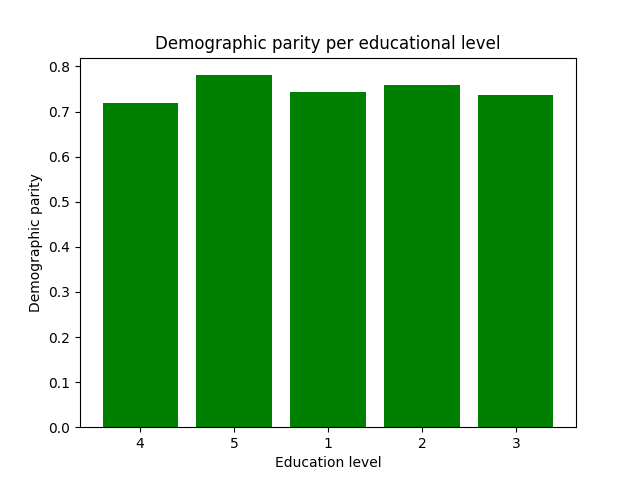

In [8]:
import matplotlib.pyplot as plt

groups_pos = [i for i, _ in enumerate(groups)]

plt.bar(groups_pos  , parities, color='green')
plt.xlabel("Education level")
plt.ylabel("Demographic parity")
plt.title("Demographic parity per educational level")

plt.xticks(groups_pos, groups)

plt.show()

In [9]:
val demographicParityDifference = Metrics.demographicParityDifference(predictions, protectedAttribute, target, "predicted")

In [10]:
val demographicParityRatio = Metrics.demographicParityRatio(predictions, protectedAttribute, target, "predicted")

In [11]:
val equalisedOddsDiff = Metrics.equalisedOddsDifference(predictions, protectedAttribute, target, "predicted")

In [12]:
val equalisedOddsRatio = Metrics.equalisedOddsRatio(predictions, protectedAttribute, target, "predicted")

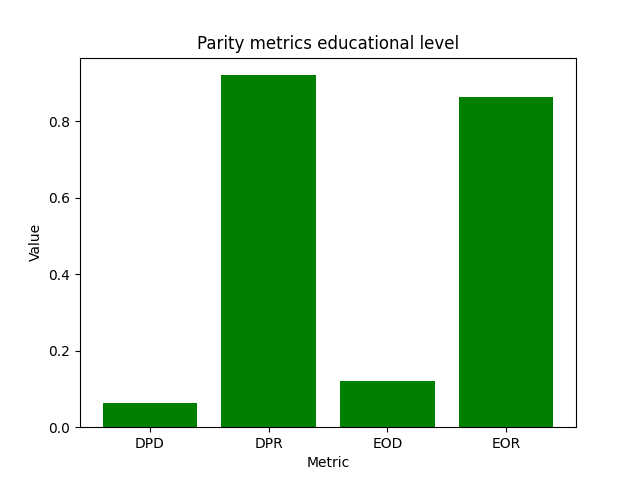

In [13]:
metrics_names = ["DPD", "DPR", "EOD", "EOR"]
metrics = [demographicParityDifference, demographicParityRatio, equalisedOddsDiff, equalisedOddsRatio]
metrics_pos = [i for i, _ in enumerate(metrics_names)]

plt.bar(metrics_pos, metrics, color='green')
plt.xlabel("Metric")
plt.ylabel("Value")
plt.title("Parity metrics educational level")

plt.xticks(metrics_pos, metrics_names)

plt.show()